In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels.api as sm

In [4]:
df = pd.read_csv('electric_production.csv')

In [5]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [7]:
df.columns = ['DATE','PRODUCTION']
df.head()
    

,DATE,PRODUCTION
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE          397 non-null object
PRODUCTION    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [9]:
df.set_index('DATE',inplace=True)

In [10]:
df.head()

,PRODUCTION
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRODUCTION,397.0,88.847218,15.387834,55.3151,77.1052,89.7795,100.5244,129.4048


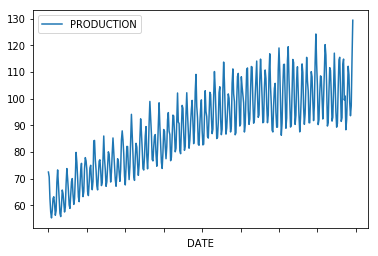

In [12]:
df.plot()

In [14]:
df.index

Index(['1/1/1985', '2/1/1985', '3/1/1985', '4/1/1985', '5/1/1985', '6/1/1985',
       '7/1/1985', '8/1/1985', '9/1/1985', '10/1/1985',
       ...
       '4/1/2017', '5/1/2017', '6/1/2017', '7/1/2017', '8/1/2017', '9/1/2017',
       '10/1/2017', '11/1/2017', '12/1/2017', '1/1/2018'],
      dtype='object', name='DATE', length=397)

In [17]:
time_Series = df['PRODUCTION']

In [19]:
type(time_Series)

pandas.core.series.Series

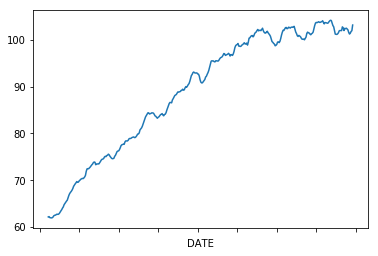

In [20]:
time_Series.rolling(12).mean().plot(label='12 month rolling')

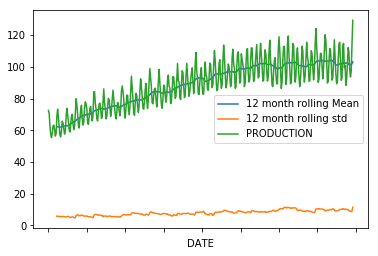

In [28]:
time_Series.rolling(12).mean().plot(label='12 month rolling Mean')
time_Series.rolling(12).std().plot(label='12 month rolling std')
time_Series.plot()
plt.legend()


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

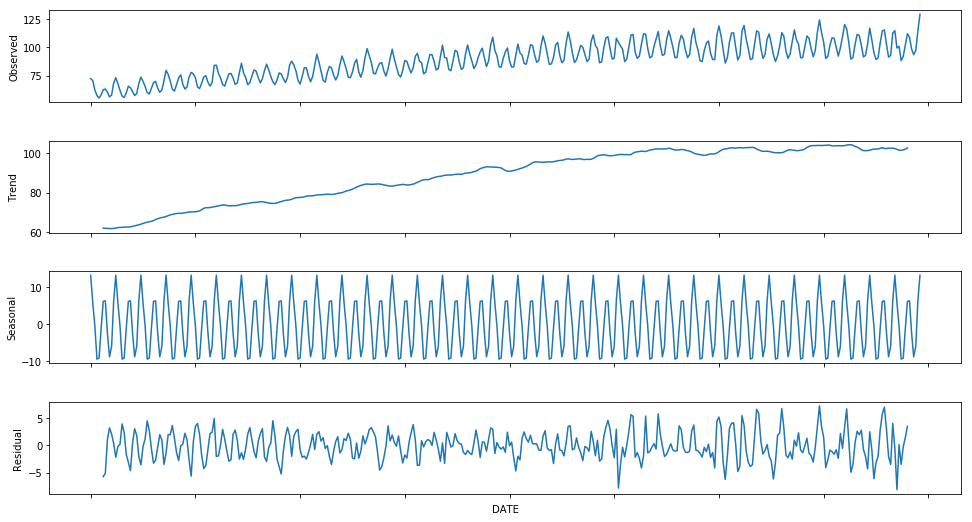

In [46]:
decomp = seasonal_decompose(time_Series,freq=12)
fig = decomp.plot()
fig.set_size_inches(15,8)

In [48]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['PRODUCTION'])
result

(-2.256990350047239,
 0.18621469116586975,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [49]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['PRODUCTION'])
def adf_check(time_Series):
    result = adfuller(time_Series)
    print("AD-FUller Test")
    labels = ['ADF Test Statistic','p-value','number of lags','number of observations used']
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
    if result[1] <= 0.05:
        print("strong evidence against hypo")
        print("Data is stationary")
    else:
        print("weak evidence against hypo")
        print("Data is not stationary")
        
        
            

In [50]:
adf_check(df['PRODUCTION'])

AD-FUller Test
ADF Test Statistic : -2.256990350047239
p-value : 0.18621469116586975
number of lags : 15
number of observations used : 381
weak evidence against hypo
Data is not stationary


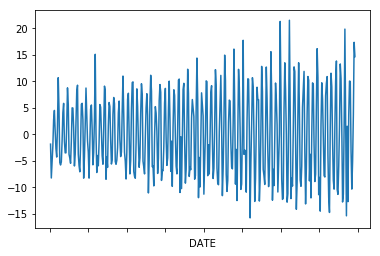

In [51]:
df['First Difference'] = df['PRODUCTION'] - df['PRODUCTION'].shift(1)
df['First Difference'].plot()

In [54]:
adf_check(df['First Difference'].dropna())

AD-FUller Test
ADF Test Statistic : -7.104890882267292
p-value : 4.0777865655398996e-10
number of lags : 14
number of observations used : 381
strong evidence against hypo
Data is stationary


In [59]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)


In [60]:
adf_check(df['Second Difference'].dropna())

AD-FUller Test
ADF Test Statistic : -9.863042323279208
p-value : 4.1836937480000375e-17
number of lags : 17
number of observations used : 377
strong evidence against hypo
Data is stationary


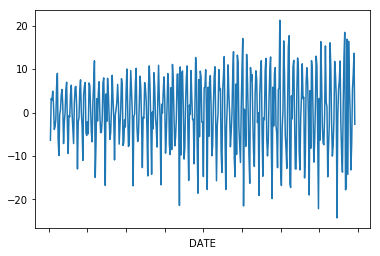

In [61]:
df['Second Difference'].plot()

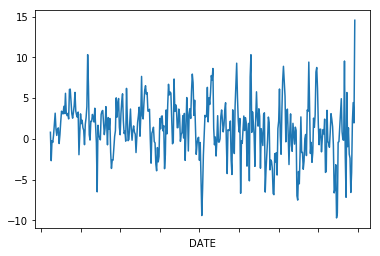

In [62]:
df['Seasonal Difference'] = df['PRODUCTION'] - df['PRODUCTION'].shift(12)
df['Seasonal Difference'].plot()

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
model = sm.tsa.statespace.SARIMAX(df['PRODUCTION'],order=(1,1,1),seasonal_order=(0,cd,0,12))
results = model.fit()
print(results.summary())

C:\Users\shanu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         PRODUCTION   No. Observations:                  397
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -928.856
Date:                            Mon, 17 Aug 2020   AIC                           1863.712
Time:                                    17:59:37   BIC                           1875.564
Sample:                                01-01-1985   HQIC                          1868.413
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0421      0.058      0.721      0.471      -0.072       0.157
ma.S.L12      -0.7790      0.041   

In [69]:
results.resid

DATE
1/1/1985     72.505200
2/1/1985     -1.833200
3/1/1985     -8.221800
4/1/1985     -4.978800
5/1/1985     -2.156300
6/1/1985      2.775300
7/1/1985      4.529800
8/1/1985      0.628300
9/1/1985     -2.663900
10/1/1985    -4.269200
11/1/1985     1.685100
12/1/1985    10.714000
1/1/1986    -31.661415
2/1/1986     -3.485609
3/1/1986      2.456958
4/1/1986     -0.210426
5/1/1986      0.937089
6/1/1986      1.311514
7/1/1986      1.335223
8/1/1986     -1.912197
9/1/1986     -0.817214
10/1/1986     0.800878
11/1/1986     0.124409
12/1/1986    -1.920245
1/1/1987      1.088276
2/1/1987     -0.046213
3/1/1987      2.448943
4/1/1987     -0.359506
5/1/1987      0.367327
6/1/1987      1.538070
               ...    
8/1/2015     -0.405233
9/1/2015      1.764317
10/1/2015    -2.621150
11/1/2015    -2.922323
12/1/2015    -3.584289
1/1/2016      5.157119
2/1/2016     -2.610101
3/1/2016     -2.593726
4/1/2016      5.792110
5/1/2016     -0.187602
6/1/2016      2.795412
7/1/2016      1.662949
8/1/20

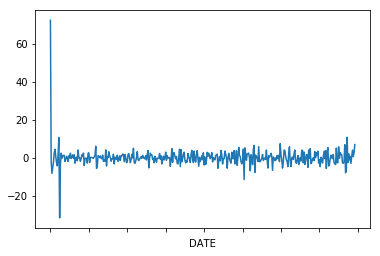

In [70]:
results.resid.plot()

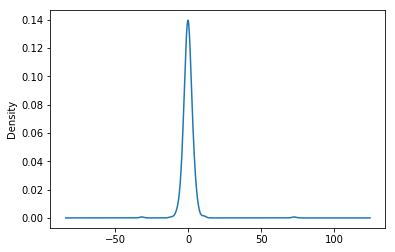

In [71]:
results.resid.plot(kind = 'kde')

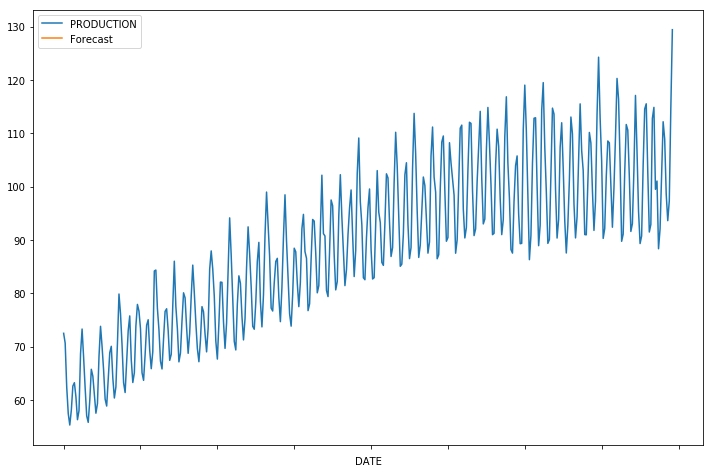

In [100]:
df['Forecast'] = results.predict(start=10, end=100)
df.interpolate(method=('linear'))
df[['PRODUCTION','Forecast']].plot(figsize=(12,8))


In [96]:
df.head()

,PRODUCTION,First Difference,Second Difference,Second Difference,Seasonal Difference,Forecast
DATE,,,,,,
1/1/1985,72.5052,NaN,NaN,NaN,NaN,NaN
2/1/1985,70.6720,-1.8332,NaN,NaN,NaN,NaN
3/1/1985,62.4502,-8.2218,-1.8332,-6.3886,NaN,NaN
4/1/1985,57.4714,-4.9788,-8.2218,3.2430,NaN,NaN
5/1/1985,55.3151,-2.1563,-4.9788,2.8225,NaN,NaN


In [90]:
df.head()

,PRODUCTION,First Difference,Second Difference,Second Difference,Seasonal Difference,Forecast
DATE,,,,,,
1/1/1985,72.5052,NaN,NaN,NaN,NaN,NaN
2/1/1985,70.6720,-1.8332,NaN,NaN,NaN,NaN
3/1/1985,62.4502,-8.2218,-1.8332,-6.3886,NaN,NaN
4/1/1985,57.4714,-4.9788,-8.2218,3.2430,NaN,NaN
5/1/1985,55.3151,-2.1563,-4.9788,2.8225,NaN,NaN


In [94]:
df.tail()

,PRODUCTION,First Difference,Second Difference,Second Difference,Seasonal Difference,Forecast
DATE,,,,,,
9/1/2017,98.6154,-10.3158,-3.2226,-7.0932,-4.1483,NaN
10/1/2017,93.6137,-5.0017,-10.3158,5.3141,2.1270,NaN
11/1/2017,97.3359,3.7222,-5.0017,8.7239,4.4459,NaN
12/1/2017,114.7212,17.3853,3.7222,13.6631,1.9518,NaN
1/1/2018,129.4048,14.6836,17.3853,-2.7017,14.5543,NaN


In [101]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

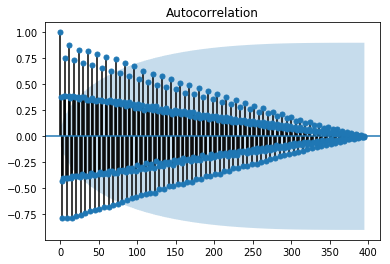

In [102]:
fig_first = plot_acf(df['First Difference'].dropna()